## La maledizione delle dimensionalità

Abbiamo visto che per ottenere un portafoglio efficiente dobbiamo usare i dati di N titoli. Dovremo quindi stimare il rendimento di questi N titoli e come questi si influenzano (covarianza).

Il nostro sistema avrà dunque:
* N rendimenti attesi
* N parametri di volatilità
* (N * (N -1)) / 2 Parametri di covarianza
    
Facciamo qualche esempio pratico per capire come il numero di parametri aumenta al variare del numero di azioni, supponiamo di avere un portafoglio di 10 azioni, poi di 100 azioni e poi di 1000 azioni.

In [1]:
%load_ext autoreload
%autoreload 2


import pandas as pd
dfStock = pd.DataFrame([10,100,1000], columns=['Num Stocks'])
dfStock['Params'] = 2 * dfStock['Num Stocks'] + (dfStock['Num Stocks'] * (dfStock['Num Stocks'] - 1) / 2)
dfStock

,Num Stocks,Params
0,10,65.0
1,100,5150.0
2,1000,501500.0


Come si vede il numero di parametri aumenta esponenzialmente, questo crea un problema perchè per stimare tutti quei dati avremo bisogno di una enorme quantità di dati.
E non è così.

Ora per risolvere il problema, come possiamo fare? La prima strada è ridurre il numero di azioni con cui lavorare.
Questa non è però una vera soluzione, di primo acchitto possiamo incrementare il campionamento e il tempo con cui lavorare.

Per stimare la covarianza possiamo usare la seguente formula:

$$
    \hat{S_{i,j}} = \frac{1}{N} \sum_{t=1}^{T} \left(R_{it} - \overline{R_i}\right) \left(R_{jt} - \overline{R_j}\right)
$$

Per calcolare $\overline{R_i}$ 

$$
    \overline{R_i} = \frac{1}{N} \sum_{t=1}^{T} R_{it}
$$

Per calcolare $\overline{R_j}$ 

$$
    \overline{R_j} = \frac{1}{N} \sum_{t=1}^{T} R_{jt}
$$


### Modello di correlazione costante

Il modello di correlazione costante ci consente di ridurre drasticamente il numero di parametri da stimare, assumiamo che il parametro di correlazione sia costante, questo fa ridurre drasticamente i parametri del nostro modello.

Ora sappiamo che questo non è vero ma alla fine è meglio stimare un parametro per bene piuttosto che stimarne tanti male.
Ora come stimiamo il nostro parametro $\hat{\rho}$.

La formula è la seguente:

$$
   \hat{\rho} = \frac{1}{N(N-1)} {\sum_{i,j=1}}_{i\neq j} \rho_{i,j}
$$

Che essenzialmnente rappresenta la media globale. Può sembrare strano ma usare questo sistema porta a creare portafogli più significativi.

### Stima della matrice di covarianza con il modello fattoriale

Siamo sempre nel tema ridiziome parametri, qui assumiamo che le azioni del nostro portafoglio siano influenzate da un ristretto numero di fattori K.

Dunque possiamo scrivere che il nostro rendimento sarà $R$ dell'asset $i$ al tempo $t$ sarà

$$
    R_it = \mu_i + \beta_{i1} F_{1t} + \cdots + \beta_{iK} F_{Kt} + \epsilon_{it}
$$

Ora usando questa notazione dobbiamo derivare come scrivere la varianza e covarianza, facciamo l'esempio a due fattori.

$$
    \sigma_{i}^{2} = \beta_{i1}^{2} \sigma_{F1}^2 +\beta_{i2}^{2} \sigma_{F2}^2 + 2\beta_{i1}\beta_{i2}Cov(F1,F2)+ \sigma_{\epsilon i}^2
$$

Mentre per la covarianza

$$
    \sigma_{i,j} = \beta_{i1} \beta_{j1} \sigma_{F1}^{2} + \beta_{i2} \beta_{j2} \sigma_{F2}^{2} + \left( \beta_{i1} \beta_{j2} +  \beta_{i2} \beta_{j1} \right) Cov(F_1,F_2) + Cov(\epsilon_{it},\epsilon_{jt}) 
$$

Ora per semplificare la formula forziamo che i valori di $\epsilon$ dei vari assett non siano correlati.
Uno degli approcci più semplici è quello della Fattorizzazione CAPM


### Approccio di contrazione

Possiamo fare una approssimazione, sappiamo che la matrice di covarianza ottenuta tramite campionamento sono piene di errore di campionamento, mentre quelle ottenure dal modello sono piene di errore di modello.

Perchè non trovare un tradeoff tra **rischio di campionamento** e **rischio di modello**?

L'idea è quella di mescolare le due matrici mediante la formula:

$$
    \hat{S} = \hat{\delta} \hat{F} + (1 - \hat{\delta}) \hat{S}
$$

## Costruzione di un portafoglio con i parametri di rischio che variano nel tempo

Abbiamo visto la maledizione della dimensionalità e come trattarla ora parlermo del fatto che i parametri variano nel tempo e dunque parleremo di **maledizione di non stazionarietà**.

Partiamo con un caso semplice con un solo asset, (non dobbiamo quindi trattare la prima parte del problema).
Lavoriamo dunque su quello che è la **Volatilità Giornaliera** $\sigma_{T}^{2}$ e il **Rendimento Giornaliero medio** $\overline{R}$ definita tra la chiusura del giorno T e la chiusura del giorno T+1.

$$
    \sigma_{T}^{2} = \frac{1}{T} \sum_{t=1}^{T} \left( R_t - \overline{R} \right) ^{2}
$$

e la media giornaliera

$$
    \overline{R} = \frac{1}{T} \sum_{t=1}^{T}  R_t
$$

Come prima cosa assumiamo che la media $R_t$ sia zero questo non dovrebbe essere un problema su dati ad alta frequenza. Dunque la varianza diventerà

$$
    \sigma_{T}^{2} = \frac{1}{T} \sum_{t=1}^{T} R_t^{2}
$$

Ora sappiamo che la volatilità non è costante durante tutto l'anno, quello che possiamo fare è creare ad esempio una finestra annuale e valutare la volatilità volta per volta. Ci saranno periodi in cui la volatilità è molto alta ad esempio il 50% altri molto bassa ad esempio il 10%

Ora stimare la volatilità usando le finestre mobili, può essere un problema perchè magari stiamo entrando in un periodo di bassa volatilità preceduto da un periodo di alta volatilità e la media potrebbe dare risultati errati.

### Media mobile esponenziale

Una soluzione semplice ma efficace per valutare la volatilità può essere quella di usare, ora invece di dare un peso uguale a tutti i rendimenti della formula appena vista possiamo cambiare leggerissimamente la formula in questo modo:


$$
    \sigma_{T}^{2} = \frac{1}{T} \sum_{t=1}^{T} \alpha_t R_t^{2}
$$

Impostiamo $\alpha_t$ come 

$$
   \alpha_t =  \sum_{t=1}^{T} \alpha_t = 1
$$

Ragioniamo i rendimenti più vicini a noi sono più accurati e man mano che ci allontaniamo questi tendono ad essere meno utili alla nostra analisi.

Perciò possiamo creare una funzione fatta in questo modo:

$$
   \alpha_t =  \lambda^{T-t}
$$

Ora il valore $\lambda$ è indicato come **fattore di decadimento**, tornando alla misura della covarianza la nostra formula sarà:

$$
    Cov(R_i,R_j) = \sum_{t=1}^{T} \alpha_t \left( R_{i,t} - \overline{R_{i}} \right) \left( R_{j,t} - \overline{R_{j}} \right) 
$$

Ora rimane un punto aperto, che valore scegliere per $\lambda$? se lo impostiamo a 1 torniamo alla situazione precedente in cui tutti i valori della serie hanno lo stesso peso, dunque sarà un valore inferiore a 1, più basso è il valore più il decadimento sarà veloce.

Il valore va calibrato ma di solito viene usato un valore attorno a 0.9

0.9999999999999999


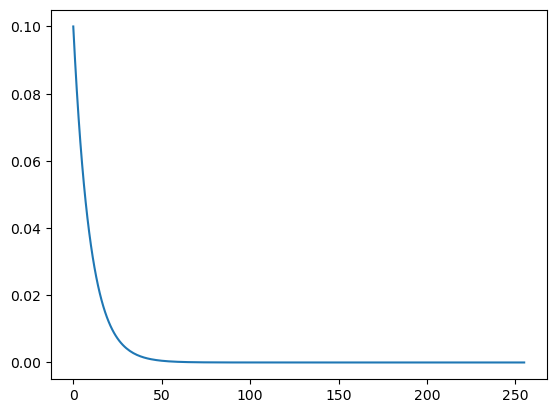

In [2]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0,256)
l = 0.9

a = l**t
total = np.sum(a)

alpha = a / total 

print(np.sum(alpha))

plt.plot(t,alpha)

## Modello ARCH e GARCH

Il modello arch è una leggera modifica a quanto aggiunge al modello la varianza a lunghissimo termine.
Ora la nostra stima sarà


$$
    \sigma_{T}^{2} = \gamma V_L +\frac{1}{T} \sum_{t=1}^{T} \alpha_t R_t^{2}
$$

Con questo vincolo

$$
    \gamma + \sum_{t=1}^{T} \alpha_t = 1
$$

Useremo la varianza a lungo termine $V_L$ come ancoraggio.
Passiamo ora al modello **GARCH** che introduce un nuovo ancoraggio vediamo la formula:


$$
    \sigma_{T}^{2} = \gamma V_L +\frac{1}{T} \sum_{t=1}^{T} \alpha_t R_t^{2} + \beta \sigma_{T - 1}^{2}
$$

Con questo vincolo

$$
    \gamma + \sum_{t=1}^{T} \alpha + \beta = 1
$$

Nella sua implementazione il modello GARH ha due parametri *p* e *q* che vengono tradotti nella formula come:

$$
    \sigma_{T}^{2} = \omega + \sum_{i=1}^{p} \alpha_i R_{T-i}^{2} + \sum_{j=1}^{q} \beta_j \sigma_{T-j}^{2}
$$


Iniziamo ora la stima delle matrice di covarianza usando i dati

In [3]:
from dataset import get_ind_returns, get_ind_market_caps
from backtest import backtest_ws, weight_ew, weight_cw
from risk import summary_stats

inds = ['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other']
#inds=['Beer', 'Hlth', 'Fin','Rtail','Whlsl']


ind_rets = get_ind_returns(weighting="ew", n_inds=49)["1974":]
ind_mcap = get_ind_market_caps(49, weights=True)["1974":]

ewr = backtest_ws(ind_rets, estimation_window=36, weighting=weight_ew)
cwr = backtest_ws(ind_rets, estimation_window=36, weighting=weight_cw, cap_weights=ind_mcap)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.131606,0.187437,-0.618137,3.820984,0.085280,0.122226,0.527384,-0.59806
CW,0.131522,0.187236,-0.546540,2.860677,0.085223,0.120151,0.527515,-0.58785


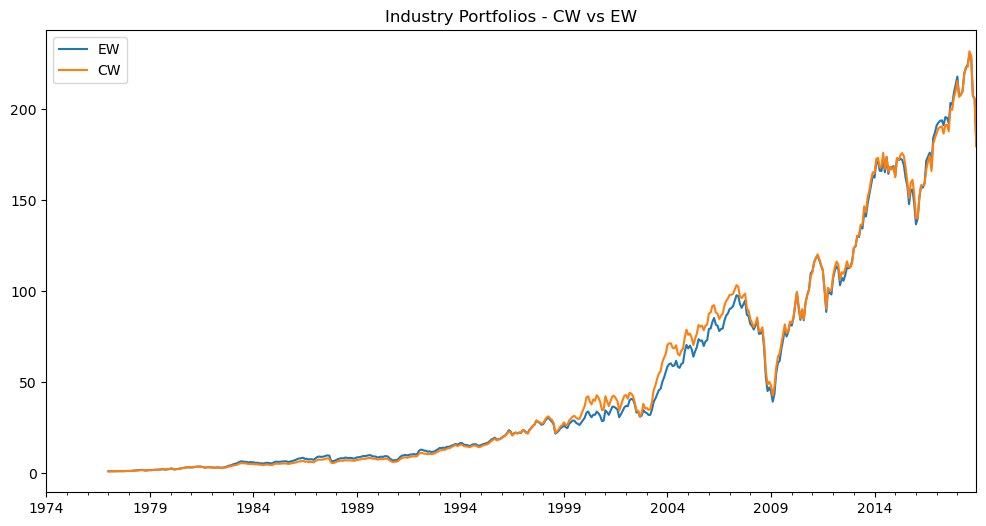

In [4]:
btr = pd.DataFrame({"EW": ewr, "CW": cwr})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios - CW vs EW")
summary_stats(btr.dropna())

### Costruzione del portafoglio a varianza minima globale

Abbiamo visto nella prima parte come costruire un portafoglio a varianza minima 

In [5]:
from optimization import gmv

def sample_cov(r, **kwargs):
    """
    Returns the sample covariance of the supplied returns
    """
    return r.cov()

def weight_gmv(r, cov_estimator=sample_cov, **kwargs):
    """
    Produces the weights of the GMV portfolio given a covariance matrix of the returns 
    """
    est_cov = cov_estimator(r, **kwargs)
    return gmv(est_cov)


Ora eseguiamo l'ottimizzazione appresa e proviamo a eseguire il backtest sui 50 anni, avremo bisogno di un pò di pazienza perchè i calcoli da eseguire non sono pochi

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.131606,0.187437,-0.618137,3.820984,0.085280,0.122226,0.527384,-0.598060
CW,0.131522,0.187236,-0.546540,2.860677,0.085223,0.120151,0.527515,-0.587850
GMV-Sample,0.153092,0.116303,-0.813828,3.454651,0.049694,0.072557,1.030057,-0.463914


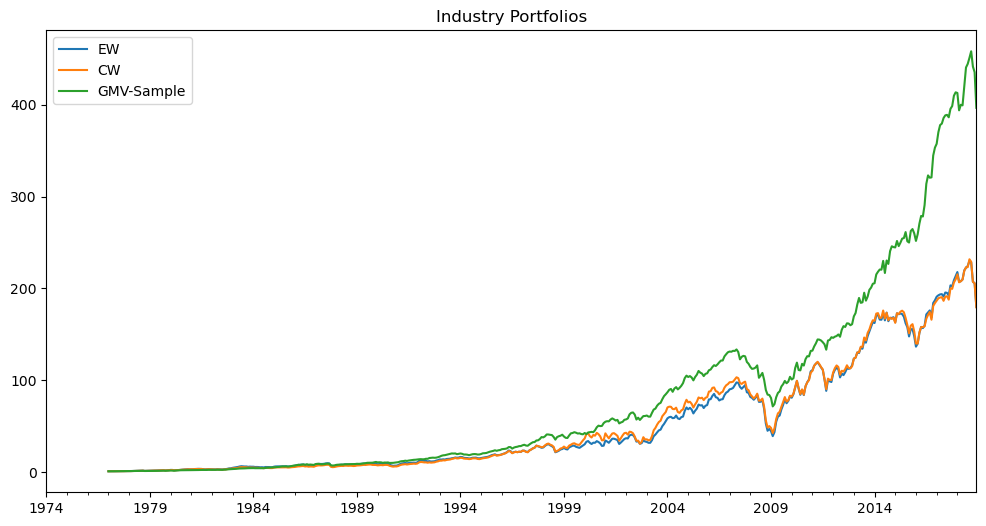

In [6]:
mv_s_r = backtest_ws(ind_rets, estimation_window=36, weighting=weight_gmv, cov_estimator=sample_cov)
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "GMV-Sample": mv_s_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
summary_stats(btr.dropna())

Ora che abbiamo le basi proviamo un nuovo stimatore per la covarianza, il modello a correlazione costante
$$ \rho_{ij} = \frac{ \sigma_{ij} } { \sqrt{ \sigma_{ii}  \sigma_{jj} } } $$

In [7]:
#import statsmodels.stats.moment_helpers as mh
def cc_cov(r, **kwargs):
    """
    Estimates a covariance matrix by using the Elton/Gruber Constant Correlation model
    """
    rhos = r.corr()
    n = rhos.shape[0]
    # this is a symmetric matrix with diagonals all 1 - so the mean correlation is ...
    rho_bar = (rhos.values.sum()-n)/(n*(n-1))
    ccor = np.full_like(rhos, rho_bar)
    np.fill_diagonal(ccor, 1.)
    sd = r.std()
    ccov = ccor * np.outer(sd, sd)
#     mh.corr2cov(ccor, sd)
    return pd.DataFrame(ccov, index=r.columns, columns=r.columns)

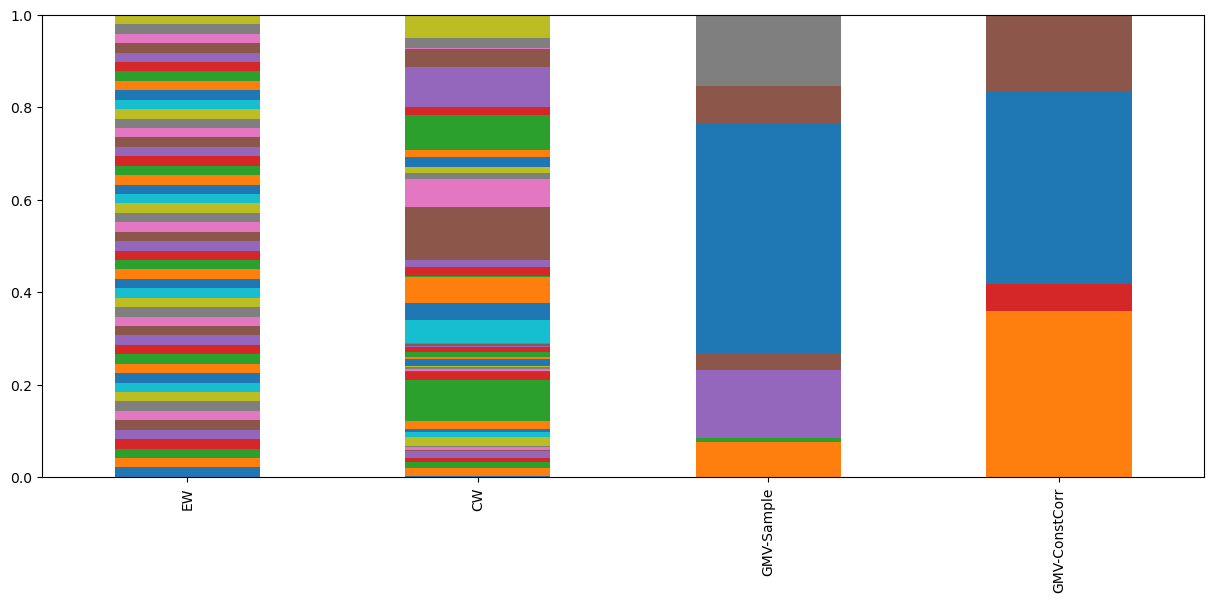

In [10]:
wts = pd.DataFrame({
    "EW": weight_ew(ind_rets["2016":]),
    "CW": weight_cw(ind_rets["2016":], cap_weights=ind_mcap),
    "GMV-Sample": weight_gmv(ind_rets["2016":], cov_estimator=sample_cov),
    "GMV-ConstCorr": weight_gmv(ind_rets["2016":], cov_estimator=cc_cov),
})
wts.T.plot.bar(stacked=True, figsize=(15,6), legend=False);

Eseguiamo un nuovo backtest con questa matrice e vediamo i risultati

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.131606,0.187437,-0.618137,3.820984,0.085280,0.122226,0.527384,-0.598060
CW,0.131522,0.187236,-0.546540,2.860677,0.085223,0.120151,0.527515,-0.587850
GMV-Sample,0.153092,0.116303,-0.813828,3.454651,0.049694,0.072557,1.030057,-0.463914
GMV-CC,0.132377,0.115347,-0.893599,3.115180,0.051615,0.075266,0.863769,-0.524088


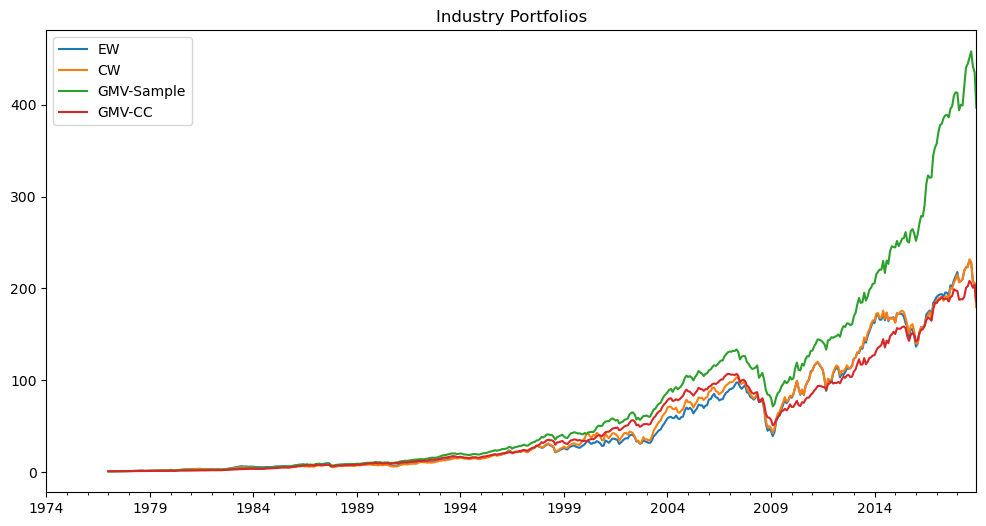

In [11]:
mv_cc_r = backtest_ws(ind_rets, estimation_window=36, weighting=weight_gmv, cov_estimator=cc_cov)
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "GMV-Sample": mv_s_r, "GMV-CC": mv_cc_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
summary_stats(btr.dropna())

Passiamo infine al modello di contrazione statistica e impostiamo il parametro $\delta$ a 0.5

In [12]:
def shrinkage_cov(r, delta=0.5, **kwargs):
    """
    Covariance estimator that shrinks between the Sample Covariance and the Constant Correlation Estimators
    """
    prior = cc_cov(r, **kwargs)
    sample = sample_cov(r, **kwargs)
    return delta*prior + (1-delta)*sample

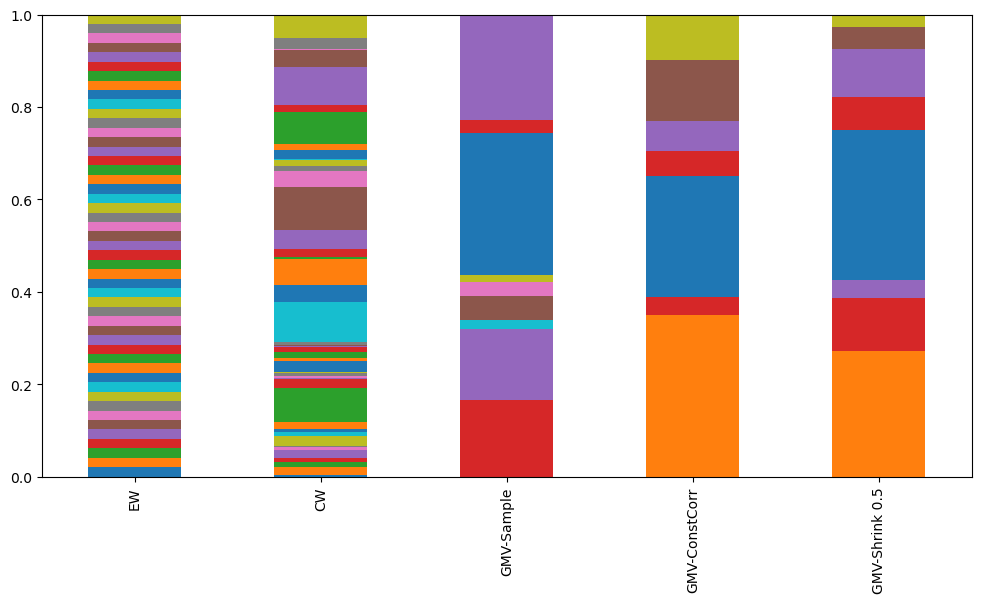

In [14]:
wts = pd.DataFrame({
    "EW": weight_ew(ind_rets["2013":]),
    "CW": weight_cw(ind_rets["2013":], cap_weights=ind_mcap),
    "GMV-Sample": weight_gmv(ind_rets["2013":], cov_estimator=sample_cov),
    "GMV-ConstCorr": weight_gmv(ind_rets["2013":], cov_estimator=cc_cov),
    "GMV-Shrink 0.5": weight_gmv(ind_rets["2013":], cov_estimator=shrinkage_cov),
})
wts.T.plot.bar(stacked=True, figsize=(12,6), legend=False);

In [17]:
col = 'GMV-Shrink 0.5'
wts[wts[col] > 0.01]

,EW,CW,GMV-Sample,GMV-ConstCorr,GMV-Shrink 0.5
Food,0.020408,0.017752,0.000000e+00,0.350072,0.272253
Beer,0.020408,0.008946,1.661047e-01,0.037495,0.113180
Smoke,0.020408,0.015302,1.525021e-01,0.000000,0.040597
Util,0.020408,0.035964,3.057101e-01,0.262604,0.324688
Meals,0.020408,0.015529,2.902188e-02,0.044706,0.069788
Banks,0.020408,0.082357,2.283632e-01,0.063880,0.104875
Insur,0.020408,0.037482,0.000000e+00,0.132326,0.046694
Other,0.020408,0.051442,2.524651e-13,0.098308,0.027925


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.131606,0.187437,-0.618137,3.820984,0.085280,0.122226,0.527384,-0.598060
CW,0.131522,0.187236,-0.546540,2.860677,0.085223,0.120151,0.527515,-0.587850
GMV-Sample,0.153092,0.116303,-0.813828,3.454651,0.049694,0.072557,1.030057,-0.463914
GMV-CC,0.132377,0.115347,-0.893599,3.115180,0.051615,0.075266,0.863769,-0.524088
GMV-Shrink 0.5,0.138503,0.114872,-0.889052,3.351122,0.050713,0.074239,0.919254,-0.518467


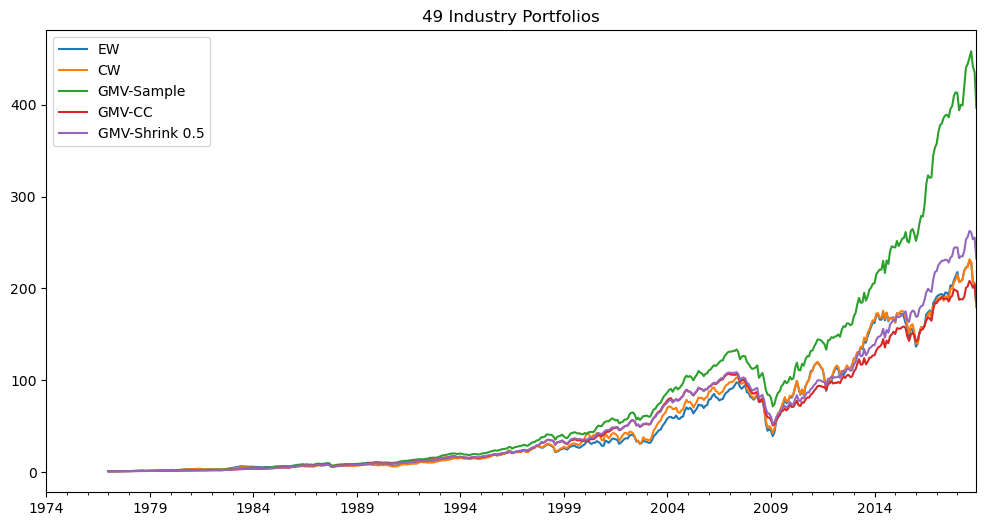

In [19]:
mv_sh_r = backtest_ws(ind_rets, estimation_window=36, weighting=weight_gmv, cov_estimator=shrinkage_cov, delta=0.5)
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "GMV-Sample": mv_s_r, "GMV-CC": mv_cc_r, 'GMV-Shrink 0.5': mv_sh_r})
(1+btr).cumprod().plot(figsize=(12,6), title="49 Industry Portfolios")
summary_stats(btr.dropna())